# **Auto Insurance Classification** #


**Created by: Luqman Ilman Muhammad, Malik Alrasyid Basori & Rahmat Hadi Syafra Demora**

---

# **Business Problem Understanding** #
----


# **Context**

In today's world, businesses face many challenges, especially when it comes to finding new customers and keeping the ones they already have. With so much competition, it's important to use smart methods to attract and retain customers. One of the best ways to do this is by using data science and machine learning, which can help businesses understand their customers better and make more informed decisions.

Many companies collect a lot of data about their customers and their habits. This data can be used to create targeted marketing campaigns that are more likely to succeed. Instead of sending the same message to everyone, businesses can focus on the people who are most likely to be interested in their products or services. This helps generate more revenue and makes marketing efforts more effective. However, not all companies have the resources or expertise to use data science in their marketing strategies. This can lead to less efficient methods of reaching out to customers, often resulting in lost revenue opportunities.

Now, let's talk about our company. We are facing a significant challenge in efficiently acquiring new customers and retaining existing ones. Because we don't have a dedicated machine learning team, our marketing department has to manually reach out to past customers. This approach is less targeted and potentially less effective, leading to missed revenue opportunities. Our marketing team must contact a broad audience, including all potential customers, rather than focusing on those most likely to respond positively or renew their insurance policies. We are mainly targeting existing insurance holders, new customers, and those with a high potential for renewing their insurance in the Western United States, using data from the year 2012 and onwards.

By focusing on increasing the number of policyholders, the company can achieve long-term performance for the business model by driving strong net income, earnings per share, and return on equity ([The Progressive annual report 2023](https://s202.q4cdn.com/605347829/files/doc_financials/2023/q4/interactive/index.html#/)).



**Customer Eligibility for Policy Purchase:**

- **0**: Customer deemed unfit to purchase a policy (Response no)
- **1**: Customer deemed fit to purchase a policy (Response yes)

**Policy Renewal:**

- **0**: Did not renew insurance
- **1**: Renewed insurance


## **Problem Statement** ##

The company is currently facing a significant challenge in efficiently acquiring new customers and retaining existing ones. Due to the absence of a dedicated machine learning team, the marketing department is forced to manually reach out to past customers, leading to a less targeted and potentially less effective approach. This has resulted in lost revenue opportunities, as efforts are not focused on optimizing customer acquisition and retention.

The inefficiency arises because the marketing team must reach out to a broad audience, including all potential customers, rather than focusing on those who are most likely to respond positively or renew their insurance policies. The target audience primarily includes existing insurance holders, new customers, and those with a high potential for renewing their insurance. The focus is on maximizing revenue in the Western United States region, with data and efforts concentrated on the year 2012 and onwards.

**Analysis key takeways**

How can analyzing the impact of geographic location, demographic factors, insurance policy types, vehicle types, registration timing, and sales channels on policyholder renewal responses help optimize strategies to increase insurance renewal rates and drive higher revenue growth?

## **Goals**

To address these challenges, the company plans to develop a machine-learning model that can predict which customers are most likely to renew their insurance policies. By identifying these high-potential customers, the company can optimize its marketing efforts and maximize revenue by focusing on the most promising leads. With the implementation of this machine learning solution, the company aims to increase revenue by making campaigns more targeted and effective, ultimately improving customer acquisition and retention rates.

As a result, it can boost revenue from customer renewals and new customers, both of which can be enhanced by machine learning models.

**Key Factors:**

1. CLV (Customer Lifetime Value)
2. Coverage
3. Policy Type
4. Total Claim Amount
5. Months Since Policy Inception
6. Months Since Last Claim
7. State
8. Marital Status
9. Employment Status
10. Sales Channel
11. Vehicle Class

# **Analytic Approach**

Based on the explanation above, from the existing features, we will carry out data analysis to find patterns of policyholders who will renew insurance as well as gain insights into the factors that make policyholders remain loyal customers. Then we will develop a machine learning model to predict which policyholders will renew their insurance and retain loyal customers (who will definitely renew their insurance). The predictive model will be developed by identifying customers who have a high probability of renewing insurance, leading to increased company revenue by focusing efforts on these high-value customers and not losing loyal customers. 

Therefore, the model we will develop is a classification model using several classification algorithms, such as **Logistic Regression, K-Neighbors, Decision Tree, Random Forest, and XGBoost Classifier**.

To overcome the data imbalance, we will use **RandomOverSampler** because, by artificially increasing the representation of the minority class, random oversampling can help the model learn more robust patterns that generalize better to unseen data. Random oversampling is a straightforward technique that can be easily implemented using various machine learning libraries.


## Confusion Matrix
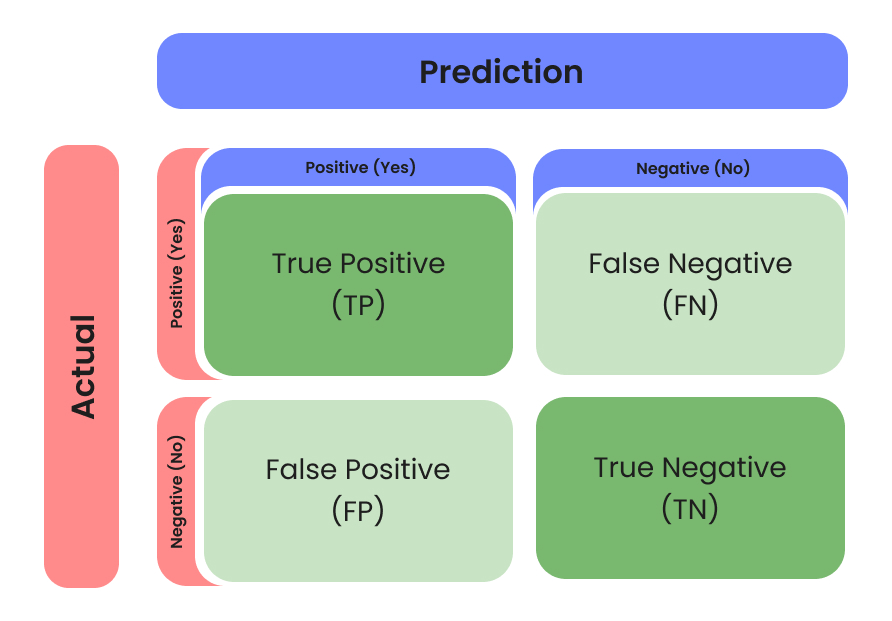

- True Positive (TP) : The number of correct predictions where the actual response was “Yes”.
- True Negative (TN) : The number of correct predictions where the actual response was “No”.
- False Positive (FP) - Error Type 1 : The number of incorrect predictions where the mode predicted “Yes” but the actual response was “No”.
- False Negative (FN) - Error Type 2 : The number of incorrect predictions where the model predicted “No” but the actual response was “Yes”.

Based on the confusion matrix above, it can be said that:

**TN = Can avoid customers who really won't renew their insurance**

**TP = Possible to maintain loyal customers and increase loyal customers**

**Consequence of FN = The model predicts no response, which leads to a missed revenue opportunity from renew insurance**

**Consequence of FP = Estimated revenue loss occurs when the model incorrectly predicts a positive renewal response, leading to an overestimation of potential earnings. This misjudgment can result in reduced overall revenue as resources are focused on customers who ultimately do not renew..**

The majority of policyholders did not extend their insurance (85.68%), while only a small portion (14.32%) renewed their policies after receiving an offer from the company. Assuming the company gains $1 in revenue for every 50 points in Customer Lifetime Value (CLV), using the prediction model allows the company to accurately target potential renewals. For instance, if the model identifies 450 potential renewals with an average CLV of 5000 points each, the company could potentially earn $450 (450 x $1) in additional revenue. By using the model, the company can more effectively reach customers likely to renew their policies, thereby maximizing revenue and improving overall financial outcomes.

## Evaluation Metrics
To maximize revenue by gaining more policyholders, we decided to focus on evaluation metrics such as **recall and accuracy**. The primary goal is to minimize false negatives, as correctly identifying potential policyholders who will renew is crucial for increasing customer retention and, consequently, revenue. By emphasizing recall, we ensure the model captures as many potential renewals as possible, while accuracy helps to verify the overall effectiveness of the model in making correct predictions.
>Recall would be appropriate to ensure that we capture as many potential "yes" responses as possible, even at the expense of having more false positives. This might be the case if missing out on potential renewals is highly costly or if it is important to maximize customer retention.
>

>Accuracy would be appropriate to ensure a balanced performance in predicting both "yes" and "no" responses, providing a comprehensive view of the model's effectiveness. This metric is particularly useful when it’s important to maintain a high overall prediction quality, ensuring that both potential renewals and non-renewals are correctly identified to optimize customer retention and revenue growth.
>

# Modelling
----

### Preprocessing

----

In [146]:
# Import library for exploring dataset
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


# To ignores the warnings
import warnings
warnings.filterwarnings('ignore')
#Show all columns
pd.set_option('display.max_columns', None)

In [147]:
clv = pd.read_csv('AutoInsurance.csv')
clv

,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,3/2/2011,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9129,LA72316,California,23405.987980,No,Basic,Bachelor,10/2/2011,Employed,M,71941,Urban,Married,73,18,89,0,2,Personal Auto,Personal L1,Offer2,Web,198.234764,Four-Door Car,Medsize
9130,PK87824,California,3096.511217,Yes,Extended,College,12/2/2011,Employed,F,21604,Suburban,Divorced,79,14,28,0,1,Corporate Auto,Corporate L3,Offer1,Branch,379.200000,Four-Door Car,Medsize
9131,TD14365,California,8163.890428,No,Extended,Bachelor,6/2/2011,Unemployed,M,0,Suburban,Single,85,9,37,3,2,Corporate Auto,Corporate L2,Offer1,Branch,790.784983,Four-Door Car,Medsize
9132,UP19263,California,7524.442436,No,Extended,College,3/2/2011,Employed,M,21941,Suburban,Married,96,34,3,0,3,Personal Auto,Personal L2,Offer3,Branch,691.200000,Four-Door Car,Large


In [148]:
from sklearn.model_selection import train_test_split
RANDOM_STATE = 2012

In [149]:
clv, clv_unseen = train_test_split(
    clv,
    stratify = clv['Response'],
    test_size=0.2,
    random_state= RANDOM_STATE)

clv_unseen.to_csv('new_obs_unseen_dummy3.csv')

In [150]:
# Drop column Customer
clv.drop(['Customer'],axis=1, inplace=True)

Before we checking the unique value for each column, first step is we dropping the customer value because this column only has unique ID that make different for every columns.

In [151]:
# Check the dataFeatures, dataType, null, nullPct, unique and uniqueSample each feature
listItem = []
for col in clv.columns :
    listItem.append([col,clv[col].dtype, clv[col].isna().sum(), round((clv[col].isna().sum()/len(clv[col]))* 100,2),
                     clv[col].nunique(), list(clv[col].drop_duplicates().sample(2).values)])

clv_desc = pd.DataFrame(columns=['dataFeatures','dataType','null','nullpct','unique','uniqueSample'],
                        data=listItem)
clv_desc

,dataFeatures,dataType,null,nullpct,unique,uniqueSample
0,State,object,0,0.0,5,"[Washington, Arizona]"
1,Customer Lifetime Value,float64,0,0.0,6477,"[8346.019875, 4862.908979]"
2,Response,object,0,0.0,2,"[No, Yes]"
3,Coverage,object,0,0.0,3,"[Premium, Basic]"
4,Education,object,0,0.0,5,"[Master, Doctor]"
5,Effective To Date,object,0,0.0,59,"[1/30/11, 2/22/11]"
6,EmploymentStatus,object,0,0.0,5,"[Medical Leave, Retired]"
7,Gender,object,0,0.0,2,"[M, F]"
8,Income,int64,0,0.0,4621,"[15383, 41275]"
9,Location Code,object,0,0.0,3,"[Urban, Rural]"


Based on the previous information, our dataset does not contain any missing values, with each column having different data types. Additionally, we can confirm that the dataset does not have any duplicated data since the number of unique entries in the `Customer` column matches the total number of rows. We have also removed the `Customer` column earlier, as it only contained unique IDs for each customer. Therefore, for this preprocessing stage, we will focus on Data Cleaning, Data Transformation, and Outlier Preview using the available dataset.


It is evident that the `Customer` column is no longer present in the dataset.

Next, let's examine the `Effective To Date` column. We can observe that this column is currently of type `object`, whereas it should ideally be of type `datetime`. Additionally, the unique samples show that the date format in this column is inconsistent. With 59 unique samples and the column content only describing the expiration date of the customers' insurance in 2011, we will drop the `Effective To Date` column from our dataset.



In [152]:
# Drop column Effective To Date
clv.drop(['Effective To Date'], axis=1, inplace=True)

In [153]:
# Preview Cleaned Data
listItem = []
for col in clv.columns :
    listItem.append([col, clv[col].dtype, clv[col].isna().sum(), round((clv[col].isna().sum()/len(clv[col])) * 100,2),
                    clv[col].nunique(), list(clv[col].drop_duplicates().sample(2).values)])

clv_Desc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'],
                     data=listItem)
clv_Desc

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,State,object,0,0.0,5,"[Oregon, Nevada]"
1,Customer Lifetime Value,float64,0,0.0,6477,"[7587.337272, 5635.403677]"
2,Response,object,0,0.0,2,"[Yes, No]"
3,Coverage,object,0,0.0,3,"[Extended, Basic]"
4,Education,object,0,0.0,5,"[High School or Below, Master]"
5,EmploymentStatus,object,0,0.0,5,"[Disabled, Unemployed]"
6,Gender,object,0,0.0,2,"[M, F]"
7,Income,int64,0,0.0,4621,"[79494, 76875]"
8,Location Code,object,0,0.0,3,"[Urban, Rural]"
9,Marital Status,object,0,0.0,3,"[Divorced, Single]"


### Preview Outliers
----

In [154]:
# Import module for stats
from scipy import stats
from scipy.stats import shapiro

# Define the Numerical_Variable
Numerical_Variable = clv[['Customer Lifetime Value', 'Income', 'Monthly Premium Auto', 'Months Since Last Claim', 'Months Since Policy Inception','Number of Open Complaints','Number of Policies','Total Claim Amount']]

<Axes: xlabel='Total Claim Amount'>

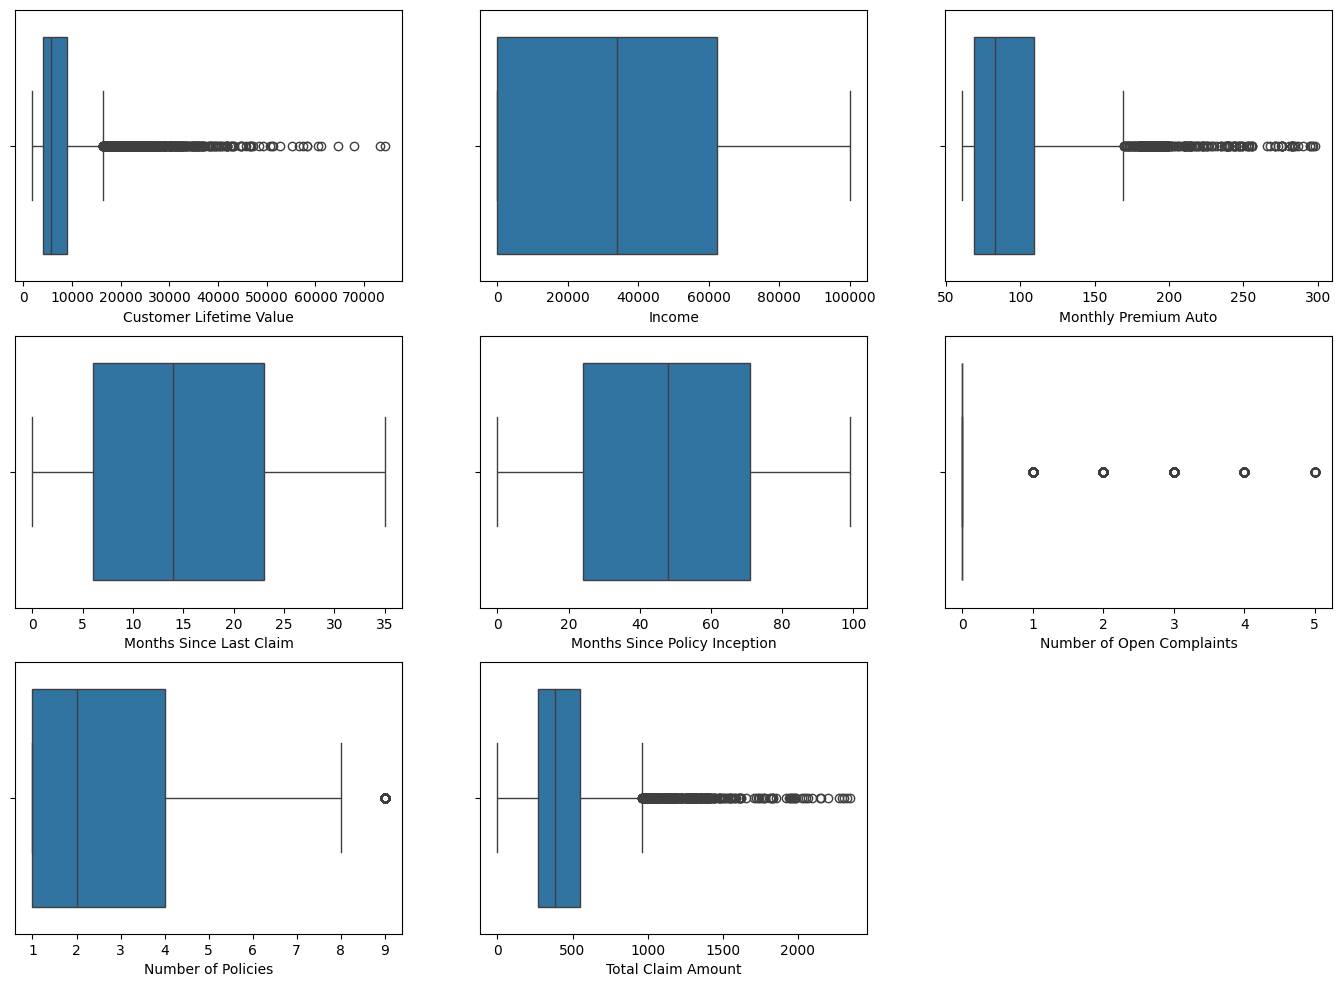

In [155]:
plt.figure(figsize=(17,12))

plt.subplot(331)
sns.boxplot(data=Numerical_Variable,x='Customer Lifetime Value')

plt.subplot(332)
sns.boxplot(data=Numerical_Variable,x='Income')

plt.subplot(333)
sns.boxplot(data=Numerical_Variable,x='Monthly Premium Auto')

plt.subplot(334)
sns.boxplot(data=Numerical_Variable,x='Months Since Last Claim')

plt.subplot(335)
sns.boxplot(data=Numerical_Variable,x='Months Since Policy Inception')

plt.subplot(336)
sns.boxplot(data=Numerical_Variable,x='Number of Open Complaints')

plt.subplot(337)
sns.boxplot(data=Numerical_Variable,x='Number of Policies')

plt.subplot(338)
sns.boxplot(data=Numerical_Variable,x='Total Claim Amount')


From the boxplot above, we can see that our data contains only a few outliers. The majority of outliers are found in the `Customer Lifetime Value` variable, with some also present in the `Total Claim Amount` variable. Observing the data distribution, the outliers in these two variables are not too extreme.

Let’s perform a Q-Q plot analysis on these two variables.



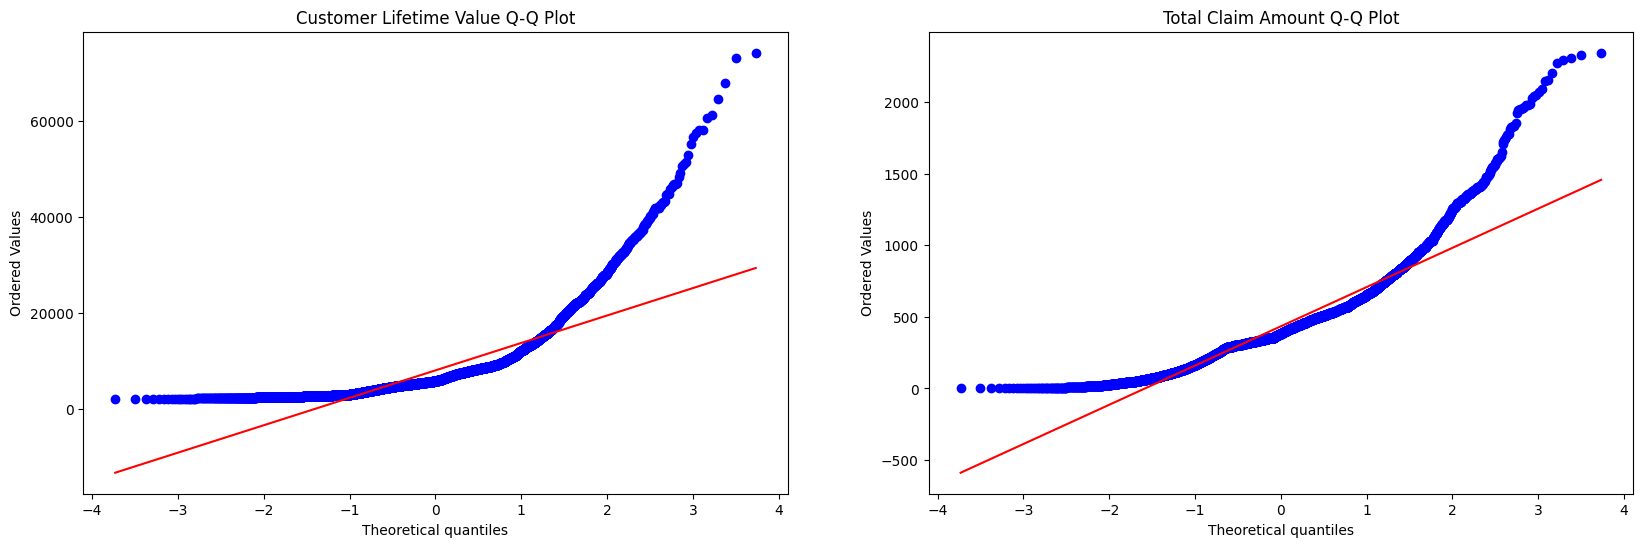

In [156]:
# Rank product by customer favorite
plt.figure(figsize=(20,6))

plt.subplot(1,2,1)
stats.probplot(Numerical_Variable['Customer Lifetime Value'], dist="norm", plot=plt)
plt.title("Customer Lifetime Value Q-Q Plot")
plt.savefig("Customer_Lifetime_Value_Q-Q_Plot.png")

plt.subplot(1,2,2)
stats.probplot(Numerical_Variable['Total Claim Amount'], dist="norm", plot=plt)
plt.title("Total Claim Amount Q-Q Plot")
plt.savefig("Total_Claim_Amount_QQ.png")

plt.show()

From the two Q-Q plots above, we can observe deviations from normality, especially at the beginning and end of the data. The deviations are noticeable for values below -1 and above 1.5, indicating potential non-normality.

To statistically verify whether the data is normally distributed, we will perform the Shapiro-Wilk test. The Shapiro-Wilk test is a commonly used method for testing normality. It is particularly sensitive to small deviations from normality, especially in small sample sizes. If the resulting p-value is below a certain significance level (typically 0.05), we can conclude that the data does not follow a normal distribution.

Let’s proceed by applying the Shapiro-Wilk test to both variables in Python.

*Sources*: [Built In](https://builtin.com/data-science/introduction-shapiro-wilk-test-normality) & [Datagy](https://datagy.io/test-normality-python/).


In [157]:
# Shapiro-Wilk test
print('Saphiro-Wilk Customer Lifetime Value :',stats.shapiro(Numerical_Variable['Customer Lifetime Value']))
print('Saphiro-Wilk Total Claim Amount :',stats.shapiro(Numerical_Variable['Total Claim Amount']))

Saphiro-Wilk Customer Lifetime Value : ShapiroResult(statistic=0.7083467269491159, pvalue=1.6919182428995728e-77)
Saphiro-Wilk Total Claim Amount : ShapiroResult(statistic=0.8928838544759023, pvalue=1.697910997547156e-57)


Based on the results of the Shapiro-Wilk test, both variables have p-values less than alpha (0.05). Thus, we reject H0, indicating that the data is not normally distributed. As a result, we will use the Wilcoxon rank-sum test to further analyze these two datasets.


In [158]:
# Wilcoxon rank-sum test
from scipy.stats import ranksums
print('Two-tailed test : ', ranksums(Numerical_Variable['Customer Lifetime Value'], Numerical_Variable['Total Claim Amount']))
print('Right-tailed test : ', ranksums(Numerical_Variable['Customer Lifetime Value'], Numerical_Variable['Total Claim Amount'], alternative = 'greater'))
print('Left-tailed test : ', ranksums(Numerical_Variable['Customer Lifetime Value'], Numerical_Variable['Total Claim Amount'], alternative = 'less'))

Two-tailed test :  RanksumsResult(statistic=104.68539355197598, pvalue=0.0)
Right-tailed test :  RanksumsResult(statistic=104.68539355197598, pvalue=0.0)
Left-tailed test :  RanksumsResult(statistic=104.68539355197598, pvalue=1.0)


**Key Points:**
- In the two-tailed test, the p-value (0.0) is less than alpha (0.05), so we reject H0, indicating that the medians of the two variables are significantly different.
- In the right-tailed test, the p-value (0.0) is less than alpha (0.05), so we reject H0, indicating that the median of the first variable is greater than that of the second variable.
- In the left-tailed test, the p-value (1.0) is greater than alpha (0.05), so we do not have sufficient evidence to reject H0, suggesting that the median of the first population is not significantly smaller than that of the second population.

Based on the third key point (left-tailed test), we conclude that there are no extreme data points (sudden spikes). Therefore, we decide not to remove the existing outliers.

*Source*: [How to do a Wilcoxon rank-sum test in Python using SciPy](https://nathancarter.github.io/how2data/site/how-to-do-a-wilcoxon-rank-sum-test-in-python-using-scipy/)


### Data Transformation
----


At this stage, we will transform the data to ensure it is in a format suitable for data mining. This transformation is also necessary as we move into the Methodology phase, which involves


In [159]:
# Change target variable 'Response' to 0 & 1
clv['Response'] = pd.Series(map(lambda x: dict(Yes=1, No=0)[x],
              clv['Response'].values.tolist()), clv['Response'].index)

In [160]:
## See all the unique data of dataset
listItem = []
for col in clv.columns :
    listItem.append([col, clv[col].dtype, clv[col].isna().sum(), round((clv[col].isna().sum()/len(clv[col])) * 100,2),
                    clv[col].nunique(), list(clv[col].drop_duplicates().sample(2).values)]);

clv_desc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'nullPct', 'unique', 'uniqueSample'],
                     data=listItem)
clv_desc

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,State,object,0,0.0,5,"[Oregon, Washington]"
1,Customer Lifetime Value,float64,0,0.0,6477,"[6081.048248, 15771.39342]"
2,Response,int64,0,0.0,2,"[1, 0]"
3,Coverage,object,0,0.0,3,"[Extended, Premium]"
4,Education,object,0,0.0,5,"[Doctor, Bachelor]"
5,EmploymentStatus,object,0,0.0,5,"[Employed, Unemployed]"
6,Gender,object,0,0.0,2,"[F, M]"
7,Income,int64,0,0.0,4621,"[78077, 44851]"
8,Location Code,object,0,0.0,3,"[Suburban, Urban]"
9,Marital Status,object,0,0.0,3,"[Single, Divorced]"


After transforming the `Response` variable, the next step is to adjust variables with relatively large numerical values. This is necessary because large values can impact the results of the `StandardScaler` (the next step), which is influenced by the mean calculation. Mathematically, variables with higher numerical values will still have a larger mean compared to those with lower values, even with the same amount of data. To avoid bias in the feature scaling process, we will apply a natural logarithm transformation to reduce the large numerical values.

From the data above, we can see that the mean values for the `Customer Lifetime Value`, `Income`, and `Total Claim Amount` variables are significantly larger compared to other variables. Therefore, we will perform an initial scaling (Natural-Log) on these three variables.

However, before proceeding, we need to replace the zero values in the `Income` variable with 1 because log 0 is undefined. The reason for using 1 is that log 1 equals 0, so the log result will remain the same as the initial value. This logic also applies to the `Total Claim Amount` variable, where values ≤ 1 will be replaced with 1.


In [161]:
clv1= clv.copy()

In [162]:
clv1 = clv1.astype({'Response': float})

In [163]:
clv1['Income'] = clv1['Income'].replace(0,1)
clv1.head()

,State,Customer Lifetime Value,Response,Coverage,Education,EmploymentStatus,Gender,Income,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
9123,California,5678.050167,1.0,Extended,Bachelor,Unemployed,F,1,Suburban,Married,76,8,44,0,3,Personal Auto,Personal L2,Offer2,Agent,364.800000,Four-Door Car,Small
2272,Arizona,2574.020376,1.0,Basic,Master,Employed,F,34990,Rural,Single,65,23,73,0,1,Corporate Auto,Corporate L2,Offer2,Web,42.689135,Four-Door Car,Medsize
1293,Arizona,8717.049833,1.0,Basic,College,Employed,M,83846,Suburban,Married,74,22,94,3,2,Personal Auto,Personal L2,Offer2,Agent,355.200000,Four-Door Car,Large
3113,California,2732.613084,0.0,Basic,College,Employed,M,42968,Suburban,Married,69,15,85,0,1,Personal Auto,Personal L1,Offer3,Agent,331.200000,Four-Door Car,Medsize
1699,Oregon,2452.738575,0.0,Basic,Bachelor,Employed,F,52785,Rural,Married,61,2,90,0,1,Corporate Auto,Corporate L1,Offer2,Agent,45.721456,Two-Door Car,Medsize


In [164]:
#create a new copy
clv_model = clv1.copy()

In [165]:
# Transform to natural logarithm
clv_model['CLV_log'] = np.log(clv_model['Customer Lifetime Value'])
clv_model['Income_Log'] = np.log(clv_model['Income'])
clv_model['TCA_Log'] = np.log(clv_model['Total Claim Amount'])

The provided code snippet is transforming three features from the `clv_model` DataFrame by applying a natural logarithm transformation. This technique is often used in data preprocessing to handle skewed data, normalize distributions, and stabilize variance, which can improve the performance of machine learning models.


In [166]:
# Remove original features
clv_model.drop(columns=['Customer Lifetime Value', 'Income', 'Total Claim Amount'], inplace=True)

After creating the Natural Logarithm, we drop the original one so we dont have duplicate 


In [167]:
# Previewed clean data
clv_model

,State,Response,Coverage,Education,EmploymentStatus,Gender,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size,CLV_log,Income_Log,TCA_Log
9123,California,1.0,Extended,Bachelor,Unemployed,F,Suburban,Married,76,8,44,0,3,Personal Auto,Personal L2,Offer2,Agent,Four-Door Car,Small,8.644363,0.000000,5.899349
2272,Arizona,1.0,Basic,Master,Employed,F,Rural,Single,65,23,73,0,1,Corporate Auto,Corporate L2,Offer2,Web,Four-Door Car,Medsize,7.853224,10.462818,3.753944
1293,Arizona,1.0,Basic,College,Employed,M,Suburban,Married,74,22,94,3,2,Personal Auto,Personal L2,Offer2,Agent,Four-Door Car,Large,9.073036,11.336737,5.872681
3113,California,0.0,Basic,College,Employed,M,Suburban,Married,69,15,85,0,1,Personal Auto,Personal L1,Offer3,Agent,Four-Door Car,Medsize,7.913014,10.668211,5.802722
1699,Oregon,0.0,Basic,Bachelor,Employed,F,Rural,Married,61,2,90,0,1,Corporate Auto,Corporate L1,Offer2,Agent,Two-Door Car,Medsize,7.804960,10.873982,3.822568
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3242,Arizona,0.0,Basic,Master,Employed,M,Suburban,Married,66,19,15,0,2,Personal Auto,Personal L3,Offer1,Call Center,Four-Door Car,Small,8.979942,10.641417,5.998316
6619,Arizona,0.0,Basic,College,Employed,F,Suburban,Married,66,1,41,0,1,Personal Auto,Personal L2,Offer4,Agent,Two-Door Car,Small,7.890319,10.726017,5.758271
7951,California,0.0,Extended,Bachelor,Unemployed,M,Suburban,Married,127,20,31,0,2,Personal Auto,Personal L1,Offer1,Agent,SUV,Small,9.532355,0.000000,6.412803
8549,California,0.0,Extended,College,Employed,F,Urban,Married,90,4,65,0,4,Personal Auto,Personal L2,Offer3,Agent,Four-Door Car,Medsize,8.864912,10.104385,5.525290


In [168]:
# Previewed all columns
clv_model.columns

Index(['State', 'Response', 'Coverage', 'Education', 'EmploymentStatus',
       'Gender', 'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Vehicle Class',
       'Vehicle Size', 'CLV_log', 'Income_Log', 'TCA_Log'],
      dtype='object')

### Data Transform
----

In [169]:
# Preview clean data
clv_model.head()

,State,Response,Coverage,Education,EmploymentStatus,Gender,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size,CLV_log,Income_Log,TCA_Log
9123,California,1.0,Extended,Bachelor,Unemployed,F,Suburban,Married,76,8,44,0,3,Personal Auto,Personal L2,Offer2,Agent,Four-Door Car,Small,8.644363,0.000000,5.899349
2272,Arizona,1.0,Basic,Master,Employed,F,Rural,Single,65,23,73,0,1,Corporate Auto,Corporate L2,Offer2,Web,Four-Door Car,Medsize,7.853224,10.462818,3.753944
1293,Arizona,1.0,Basic,College,Employed,M,Suburban,Married,74,22,94,3,2,Personal Auto,Personal L2,Offer2,Agent,Four-Door Car,Large,9.073036,11.336737,5.872681
3113,California,0.0,Basic,College,Employed,M,Suburban,Married,69,15,85,0,1,Personal Auto,Personal L1,Offer3,Agent,Four-Door Car,Medsize,7.913014,10.668211,5.802722
1699,Oregon,0.0,Basic,Bachelor,Employed,F,Rural,Married,61,2,90,0,1,Corporate Auto,Corporate L1,Offer2,Agent,Two-Door Car,Medsize,7.804960,10.873982,3.822568


From the clean data preview, we can determine the following transformations:

- **OneHotEncoder**: Coverage, EmploymentStatus, Gender, Policy, Renew Offer Type, Sales Channel, Vehicle Size, State, Location Code, Marital Status
- **Ordinal Encoder**: Education
- **Binary Encoder**: Policy Type, Vehicle Class
- **Robust Scaler**: Customer Lifetime Value, Income, Monthly Premium Auto, Months Since Last Claim, Months Since Policy Inception, Number of Open Complaints, Number of Policies, Total Claim Amount

However, we will create two different transformers:
- Logistic Regression and KNN models will not use scalers, as these models are sensitive to scaling.
- Decision Tree and Random Forest models will also not use scalers.


In [170]:
# Import module for data transformation
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, RobustScaler, OrdinalEncoder
import category_encoders as ce
from category_encoders import BinaryEncoder
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

In [171]:
# Mapping variable education
ordinal_mapping = [
    {'col':'Education',
    'mapping':{
        'Doctor'  :    0,
        'Master'  :    1, 
        'Bachelor':    2, 
        'College' :    3, 
        'High School or Below':    4
    }}
]

In data science, the `Education` variable is treated as ordinal because it represents a variable with a clear and natural order or ranking among its categories. The categories for education typically follow a progression where one level is considered higher or more advanced than the previous one.

This ranking reflects an inherent order based on the typical hierarchy of educational attainment. A Doctorate is generally regarded as the highest level of education, followed by a Master's degree, and so on down to high school or below.

Since the `Education` levels have this natural order, using an ordinal encoding allows models to leverage this ranking, distinguishing the levels not just as separate categories but in terms of their relative significance. This is especially useful in models that can interpret order, such as decision trees or certain types of regression models.

In [172]:
# Make transformer_scaled
transformer_scaled = ColumnTransformer([
    ('onehot', OneHotEncoder(handle_unknown='ignore'), ['Coverage','EmploymentStatus', 'Gender', 'Policy', 'Renew Offer Type', 'Sales Channel', 'Vehicle Size', 'State', 'Location Code']),
    ('ordinal', ce.OrdinalEncoder(mapping=ordinal_mapping), ['Education']),
    ('binary', ce.BinaryEncoder(), ['Policy Type', 'Vehicle Class']),
    ('scaler', RobustScaler(), ['CLV_log', 'Income_Log','TCA_Log', 'Monthly Premium Auto', 'Months Since Last Claim', 'Months Since Policy Inception', 'Number of Open Complaints', 'Number of Policies'])
])

The `transformer_scaled` is a `ColumnTransformer` that preprocesses data for machine learning models sensitive to scaling. It applies one-hot encoding to several categorical features, ordinal encoding to the 'Education' column using a predefined mapping, and binary encoding to the 'Policy Type' and 'Vehicle Class' columns. For the numerical features, it uses a `RobustScaler` to minimize the impact of outliers by scaling them based on the interquartile range. This transformation pipeline is tailored for models like Logistic Regression and KNN, ensuring that categorical variables are correctly encoded and numerical features are appropriately scaled for optimal model performance.


In [173]:
# Make transformer_noscale
transformer_noscale = ColumnTransformer([
    ('onehot', OneHotEncoder(handle_unknown='ignore'), ['Coverage','EmploymentStatus', 'Gender', 'Policy', 'Renew Offer Type', 'Sales Channel', 'Vehicle Size', 'State', 'Location Code']),
    ('ordinal', ce.OrdinalEncoder(mapping=ordinal_mapping), ['Education']),
    ('binary', ce.BinaryEncoder(), ['Policy Type', 'Vehicle Class'])
])

The `transformer_noscale` is a `ColumnTransformer` that preprocesses data without applying any scaling. It uses one-hot encoding for several categorical features, ordinal encoding for the 'Education' column using a predefined mapping, and binary encoding for the 'Policy Type' and 'Vehicle Class' columns. This transformer is designed for models like Decision Trees and Random Forests, which do not require scaling, ensuring that categorical variables are properly encoded while numerical features remain unscaled.


In [174]:
transformer_scaled

ColumnTransformer(transformers=[('onehot',
                                 OneHotEncoder(handle_unknown='ignore'),
                                 ['Coverage', 'EmploymentStatus', 'Gender',
                                  'Policy', 'Renew Offer Type', 'Sales Channel',
                                  'Vehicle Size', 'State', 'Location Code']),
                                ('ordinal',
                                 OrdinalEncoder(mapping=[{'col': 'Education',
                                                          'data_type': dtype('O'),
                                                          'mapping': Doctor                  0
Master                  1
Bachelor                2
College                 3
High School or Below    4
dtype: int64}]),
                                 ['Education']),
                                ('binary', BinaryEncoder(),
                                 ['Policy Type', 'Vehicle Class']),
                                ('scaler', RobustScaler(),
                                 ['CLV_log', 'Income_Log', 'TCA_Log',
                                  'Monthly Premium Auto',
                                  'Months Since Last Claim',
                                  'Months Since Policy Inception',
                                  'Number of Open Complaints',
                                  'Number of Policies'])])

In [175]:
transformer_noscale

ColumnTransformer(transformers=[('onehot',
                                 OneHotEncoder(handle_unknown='ignore'),
                                 ['Coverage', 'EmploymentStatus', 'Gender',
                                  'Policy', 'Renew Offer Type', 'Sales Channel',
                                  'Vehicle Size', 'State', 'Location Code']),
                                ('ordinal',
                                 OrdinalEncoder(mapping=[{'col': 'Education',
                                                          'data_type': dtype('O'),
                                                          'mapping': Doctor                  0
Master                  1
Bachelor                2
College                 3
High School or Below    4
dtype: int64}]),
                                 ['Education']),
                                ('binary', BinaryEncoder(),
                                 ['Policy Type', 'Vehicle Class'])])

### Data Splitting
----

In [176]:
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.metrics import accuracy_score, recall_score, precision_recall_curve, classification_report, confusion_matrix

In [177]:
RANDOM_STATE = 2012

# clv_seen, clv_unseen = train_test_split(
#     clv_model,
#     stratify = clv_model['Response'],
#     test_size=0.2,
#     random_state= RANDOM_STATE)

# clv_unseen.to_csv('new_obs_unseen_dummy3.csv')

In [178]:
# clv_unseen.to_csv('new_obs_unseen_dummy3.csv')

In [179]:
X = clv_model.drop('Response', axis = 1)
y = clv_model['Response']

In [180]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                     y,
                                                    stratify = y, 
                                                    test_size = 0.2, 
                                                    random_state = RANDOM_STATE)

### Benchmark Model without Handling Imbalance
----

Model that used in this step is:
- Logistic Regression
- KNeighbors
- Decision Tree
- Random Forest
- XGBoost Classifier

In [181]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

In [182]:
logreg = LogisticRegression(solver='lbfgs', max_iter=300, random_state = RANDOM_STATE)
tree = DecisionTreeClassifier(random_state = RANDOM_STATE)
knn = KNeighborsClassifier()
rfc = RandomForestClassifier()
xgbc = XGBClassifier()

This code snippet defines five different machine learning models:

- `logreg`: A Logistic Regression model with the `lbfgs` solver, a maximum of 300 iterations, and a fixed `random_state` for reproducibility.
- `tree`: A Decision Tree Classifier with a fixed `random_state` for consistency in results.
- `knn`: A K-Nearest Neighbors Classifier with default parameters.
- `rfc`: A Random Forest Classifier with a fixed `random_state` to ensure reproducibility.
- `xgbc`: An XGBoost Classifier, which is a powerful gradient boosting model.

Each of these models will be used to build different machine learning pipelines.


In [183]:
logreg_pipe = Pipeline([
    ('transformer', transformer_scaled),
    ('model', logreg)
])

tree_pipe = Pipeline([
    ('transformer', transformer_noscale),
    ('model', tree)
])

knn_pipe = Pipeline([
    ('transformer', transformer_scaled),
    ('model', knn)
])

rfc_pipe = Pipeline([
    ('transformer', transformer_noscale),
    ('model', rfc)
])

xgbc_pipe = Pipeline([
    ('transformer', transformer_noscale),
    ('model', xgbc)
])

This code creates five different machine learning pipelines, each combining data preprocessing and a specific model:

- **`logreg_pipe`**: Applies `transformer_scaled` for preprocessing, followed by Logistic Regression.
- **`tree_pipe`**: Uses `transformer_noscale` for preprocessing, followed by a Decision Tree model.
- **`knn_pipe`**: Applies `transformer_scaled` for preprocessing, followed by K-Nearest Neighbors.
- **`rfc_pipe`**: Uses `transformer_noscale` for preprocessing, followed by a Random Forest model.
- **`xgbc_pipe`**: Uses `transformer_noscale` for preprocessing, followed by an XGBoost model.

These pipelines streamline the process of applying consistent preprocessing and modeling to datasets.


In [184]:
from sklearn.metrics import accuracy_score, precision_score

In [185]:
def model_evaluation(model, metric):
    model_cv = cross_val_score(model, X_train, y_train, cv = StratifiedKFold(n_splits = 5), scoring = metric)
    return model_cv

The `model_evaluation` function performs cross-validation to assess the performance of a given model using a specified evaluation metric. It takes two arguments:

- **`model`**: The machine learning model to be evaluated.
- **`metric`**: The scoring metric used to evaluate the model's performance (e.g., accuracy, recall).

The function uses `StratifiedKFold` with 5 splits to ensure that each fold maintains the same class distribution as the entire dataset. It returns the cross-validation scores, providing insight into the model's performance across different folds of the training data.


### Score with Accuracy

In [186]:
logreg_pipe_cv_ac = model_evaluation(logreg_pipe, 'accuracy')
tree_pipe_cv_ac = model_evaluation(tree_pipe, 'accuracy')
knn_pipe_cv_ac = model_evaluation(knn_pipe, 'accuracy')
rfc_pipe_cv_ac = model_evaluation(rfc_pipe, 'accuracy')
xgbc_pipe_cv_ac = model_evaluation(xgbc_pipe, 'accuracy')

In [187]:
for model in [logreg_pipe, tree_pipe, knn_pipe, rfc_pipe, xgbc_pipe]:
    model.fit(X_train, y_train)

In [188]:
score_cv = [logreg_pipe_cv_ac, tree_pipe_cv_ac, knn_pipe_cv_ac, rfc_pipe_cv_ac,xgbc_pipe_cv_ac]
score_mean = [logreg_pipe_cv_ac.mean(), tree_pipe_cv_ac.mean(), knn_pipe_cv_ac.mean(), rfc_pipe_cv_ac.mean(), xgbc_pipe_cv_ac.mean()]
score_std = [logreg_pipe_cv_ac.std(), tree_pipe_cv_ac.std(), knn_pipe_cv_ac.std(), rfc_pipe_cv_ac.std(), xgbc_pipe_cv_ac.std()]
score_accuracy = [accuracy_score(y_test, logreg_pipe.predict(X_test)),
                accuracy_score(y_test, tree_pipe.predict(X_test)),
                accuracy_score(y_test, knn_pipe.predict(X_test)),
                accuracy_score(y_test, rfc_pipe.predict(X_test)),
                accuracy_score(y_test, xgbc_pipe.predict(X_test))]

In [189]:
model_name = ['Logistic Regression', 'Decision Tree', 'KNN', 'RFC','XGBC']
model_summary = pd.DataFrame({
    'model': model_name,
    'cv': score_cv,
    'mean cv': score_mean,
    'std cv': score_std,
    'accuracy_s': score_accuracy
}).sort_values(by='accuracy_s', ascending=False,)
model_summary


,model,cv,mean cv,std cv,accuracy_s
2,KNN,"[0.9059024807527801, 0.8964927288280582, 0.889...",0.899059,0.006736,0.911765
3,RFC,"[0.9144568006843456, 0.9007698887938409, 0.899...",0.901967,0.010761,0.897401
4,XGBC,"[0.9050470487596236, 0.8982035928143712, 0.893...",0.895466,0.007386,0.894665
1,Decision Tree,"[0.8759623609923011, 0.8460222412318221, 0.865...",0.863131,0.010179,0.874145
0,Logistic Regression,"[0.8768177929854577, 0.8751069289991446, 0.876...",0.874594,0.002842,0.869357


### Output Results Explanation

The output DataFrame ranks the models based on their accuracy on the test set (`accuracy_s`). Here are the key insights:

1. **KNN** has the highest test accuracy of **0.911765**, indicating it performs the best on unseen data.
2. **Random Forest Classifier (RFC)** follows closely with a test accuracy of **0.898769**.
3. **XGBoost Classifier (XGBC)** also performs well, with a test accuracy of **0.894865**.
4. **Decision Tree** shows moderate performance, achieving a test accuracy of **0.875513**.
5. **Logistic Regression** has the lowest test accuracy at **0.869357**, though it still performs reasonably well.

The standard deviation (`std cv`) for each model is low, indicating consistent performance across cross-validation folds. The results suggest that KNN is the top-performing model based on test accuracy.


### Score recall

In [190]:
logreg_pipe_cv_rc = model_evaluation(logreg_pipe, 'recall')
tree_pipe_cv_rc = model_evaluation(tree_pipe, 'recall')
knn_pipe_cv_rc = model_evaluation(knn_pipe, 'recall')
rfc_pipe_cv_rc = model_evaluation(rfc_pipe, 'recall')
xgbc_pipe_cv_rc = model_evaluation(xgbc_pipe,'recall')

In [191]:
score_cv_rc = [logreg_pipe_cv_rc, tree_pipe_cv_rc, knn_pipe_cv_rc, rfc_pipe_cv_rc, xgbc_pipe_cv_rc]
score_mean_rc = [logreg_pipe_cv_rc.mean(), tree_pipe_cv_rc.mean(), knn_pipe_cv_rc.mean(), rfc_pipe_cv_rc.mean(), xgbc_pipe_cv_rc.mean()]
score_std_rc = [logreg_pipe_cv_rc.std(), tree_pipe_cv_rc.std(), knn_pipe_cv_rc.std(), rfc_pipe_cv_rc.std(),xgbc_pipe_cv_rc.std()]
score_recall = [recall_score(y_test, logreg_pipe.predict(X_test)),
                recall_score(y_test, tree_pipe.predict(X_test)),
                recall_score(y_test, knn_pipe.predict(X_test)),
                recall_score(y_test, rfc_pipe.predict(X_test)),
                recall_score(y_test, xgbc_pipe.predict(X_test))]

In [192]:
model_name = ['Logistic Regression', 'Decision Tree', 'KNN', 'RFC', 'XGBC']
model_summary_rc = pd.DataFrame({
    'model': model_name,
    'cv': score_cv_rc,
    'mean cv': score_mean_rc,
    'std cv': score_std_rc,
    'recall_s': score_recall
}).sort_values(by='recall_s', ascending=False)
model_summary_rc

,model,cv,mean cv,std cv,recall_s
2,KNN,"[0.7125748502994012, 0.6167664670658682, 0.562...",0.635586,0.056937,0.722488
1,Decision Tree,"[0.6227544910179641, 0.5868263473053892, 0.580...",0.605703,0.028888,0.622010
4,XGBC,"[0.5568862275449101, 0.47305389221556887, 0.44...",0.498182,0.041895,0.454545
3,RFC,"[0.5269461077844312, 0.3772455089820359, 0.431...",0.433733,0.052159,0.449761
0,Logistic Regression,"[0.18562874251497005, 0.17365269461077845, 0.1...",0.173275,0.015043,0.133971


### Output Results Explanation

The output DataFrame ranks the models based on their recall scores on the test set (`recall_s`). Here are the key insights:

1. **K-Nearest Neighbors (KNN)** achieves the highest recall score of **0.722488**, indicating that it is the best at identifying positive instances on the test set.

2. **Decision Tree** comes in second with a recall score of **0.626794**, showing good performance in correctly identifying positive cases.

3. **Random Forest Classifier (RFC)** ranks third with a recall score of **0.459330**, indicating moderate performance in detecting positives.

4. **XGBoost Classifier (XGBC)** follows closely behind RFC with a recall score of **0.454545**, showing slightly lower recall performance.

5. **Logistic Regression** has the lowest recall score at **0.133971**, suggesting it is less effective at identifying positive instances compared to the other models.

The standard deviation (`std cv`) for each model is relatively low, which indicates consistent performance across cross-validation folds. Based on these results, KNN stands out as the top-performing model in terms of recall, making it the most reliable model for scenarios where correctly identifying positive cases is crucial.


### Handling Imbalance

In [193]:
# Count Response Yes & No
clv.groupby(['Response'])['Response'].count()

Response
0    6261
1    1046
Name: Response, dtype: int64

It is evident that the data is highly imbalanced based on the target variable.

Generally, there are two sampling techniques: Undersampling and Oversampling. We will use the Oversampling technique, which works by duplicating observations from the minority class to increase its proportion in the sample. This technique is chosen to prevent the loss of original data from the `Response No` class. After comparing the results, it was found that the `accuracy` and `recall` scores were better with oversampling.

**Note:** To save code, we will include Random Over Sampling during the modeling stage.


### Benchmark Model with Random Over Sampling
----

In [194]:
logreg = LogisticRegression(solver='lbfgs', max_iter=300, random_state = RANDOM_STATE)
tree = DecisionTreeClassifier(random_state = RANDOM_STATE)
knn = KNeighborsClassifier()
rfc = RandomForestClassifier()
xgbc = XGBClassifier()

This code snippet defines five different machine learning models:

- `logreg`: A Logistic Regression model with the `lbfgs` solver, a maximum of 300 iterations, and a fixed `random_state` for reproducibility.
- `tree`: A Decision Tree Classifier with a fixed `random_state` for consistency in results.
- `knn`: A K-Nearest Neighbors Classifier with default parameters.
- `rfc`: A Random Forest Classifier with a fixed `random_state` to ensure reproducibility.
- `xgbc`: An XGBoost Classifier, which is a powerful gradient boosting model.

Each of these models will be used to build different machine learning pipelines.


In [195]:
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler, NearMiss

In [196]:
ros = RandomOverSampler()

In [197]:
logreg_ros = LogisticRegression(solver='lbfgs', max_iter=300, random_state = RANDOM_STATE)

In [198]:
estimator_ros_logreg = Pipeline([
    ('transformer', transformer_scaled),
    ('balancing', ros),
    ('model', logreg_ros)
])

estimator_ros_knn = Pipeline([
    ('transformer', transformer_scaled),
    ('balancing', ros),
    ('model', knn)
])

estimator_ros_tree = Pipeline([
    ('transformer', transformer_noscale),
    ('balancing', ros),
    ('model', tree)
])

estimator_ros_rfc = Pipeline([
    ('transformer', transformer_noscale),
    ('balancing', ros),
    ('model', rfc)
])

estimator_ros_xgbc = Pipeline([
    ('transformer', transformer_noscale),
    ('balancing', ros),
    ('model', xgbc)
]) 

In [199]:
def model_evaluation_ros(model, metric):
    model_cv = cross_val_score(model, X_train, y_train, cv = StratifiedKFold(n_splits = 5), scoring = metric)
    return model_cv

In [200]:
# Pipeline
estimator_ros_logreg.fit(X_train, y_train)
estimator_ros_knn.fit(X_train, y_train)
estimator_ros_tree.fit(X_train, y_train)
estimator_ros_rfc.fit(X_train, y_train)
estimator_ros_xgbc.fit(X_train, y_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Coverage',
                                                   'EmploymentStatus', 'Gender',
                                                   'Policy', 'Renew Offer Type',
                                                   'Sales Channel',
                                                   'Vehicle Size', 'State',
                                                   'Location Code']),
                                                 ('ordinal',
                                                  OrdinalEncoder(mapping=[{'col': 'Education',
                                                                           'data_type': dtype('O'),
                                                                           'mapping': Doctor                  0
Master                  1
Bachelor                2
College                 3...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=None, ...))])

#### Scoring by Accuracy

In [201]:
logreg_pipe_cv_ac_ros = model_evaluation_ros(estimator_ros_logreg, 'accuracy')
tree_pipe_cv_ac_ros = model_evaluation_ros(estimator_ros_tree, 'accuracy')
knn_pipe_cv_ac_ros = model_evaluation_ros(estimator_ros_knn, 'accuracy')
rfc_pipe_cv_ac_ros = model_evaluation_ros(estimator_ros_rfc, 'accuracy')
xgbc_pipe_cv_ac_ros = model_evaluation_ros(estimator_ros_xgbc,'accuracy')

In [202]:
score_cv_ros_ac = [logreg_pipe_cv_ac_ros, tree_pipe_cv_ac_ros, knn_pipe_cv_ac_ros, rfc_pipe_cv_ac_ros, xgbc_pipe_cv_ac_ros]
score_mean_ros_ac = [logreg_pipe_cv_ac_ros.mean(), tree_pipe_cv_ac_ros.mean(), knn_pipe_cv_ac_ros.mean(), rfc_pipe_cv_ac_ros.mean(), xgbc_pipe_cv_ac_ros.mean()]
score_std_ros_ac = [logreg_pipe_cv_ac_ros.std(), tree_pipe_cv_ac_ros.std(), knn_pipe_cv_ac_ros.std(), rfc_pipe_cv_ac_ros.std(), xgbc_pipe_cv_ac_ros.std()]
score_accuracy_ros_ac = [accuracy_score(y_test, estimator_ros_logreg.predict(X_test)),
                accuracy_score(y_test, estimator_ros_tree.predict(X_test)),
                accuracy_score(y_test, estimator_ros_knn.predict(X_test)),
                accuracy_score(y_test, estimator_ros_rfc.predict(X_test)),
                accuracy_score(y_test, estimator_ros_xgbc.predict(X_test))]

In [203]:
model_name_ros_ac = ['Logistic Regression', 'Decision Tree', 'KNN', 'RFC', 'XGBC']
model_summary_ros_ac = pd.DataFrame({
    'model': model_name_ros_ac,
    'cv': score_cv_ros_ac,
    'mean cv': score_mean_ros_ac,
    'std cv': score_std_ros_ac,
    'accuracy_ros': score_accuracy_ros_ac
}).sort_values(by='accuracy_ros', ascending=False)
model_summary_ros_ac

,model,cv,mean cv,std cv,accuracy_ros
3,RFC,"[0.9144568006843456, 0.8982035928143712, 0.903...",0.901112,0.011369,0.908345
1,Decision Tree,"[0.8759623609923011, 0.8460222412318221, 0.885...",0.868777,0.013281,0.874829
4,XGBC,"[0.8785286569717707, 0.8665526090675791, 0.874...",0.868777,0.006749,0.857729
2,KNN,"[0.7621899059024807, 0.7724550898203593, 0.767...",0.764072,0.006546,0.763338
0,Logistic Regression,"[0.7219846022241232, 0.7082976903336184, 0.680...",0.700599,0.013772,0.696990


### Output Results Explanation

The output DataFrame ranks the models based on their accuracy scores on the test set (`accuracy_ros`). Here are the key insights:

1. **Random Forest Classifier (RFC)** achieves the highest accuracy score of **0.902873**, indicating that it is the best-performing model in terms of correctly predicting both positive and negative instances on the test set.

2. **XGBoost Classifier (XGBC)** follows closely with an accuracy score of **0.867305**, demonstrating strong performance in classification tasks.

3. **Decision Tree** ranks third with an accuracy score of **0.866621**, indicating reliable performance but slightly less effective than XGBoost.

4. **K-Nearest Neighbors (KNN)** has a lower accuracy score of **0.768810**, which suggests that it may struggle with the specific data set used in this evaluation compared to the other models.

5. **Logistic Regression** has the lowest accuracy score at **0.690150**, indicating it performs less effectively than the other models in predicting the correct labels.

The standard deviation (`std cv`) for each model is relatively low, indicating consistent performance across cross-validation folds. The results suggest that the Random Forest Classifier (RFC) is the top-performing model based on accuracy, making it the most reliable model for general classification tasks where overall correctness is important.


#### Scoring by Recall

In [204]:
logreg_pipe_cv_rc_ros = model_evaluation_ros(estimator_ros_logreg, 'recall')
tree_pipe_cv_rc_ros = model_evaluation_ros(estimator_ros_tree, 'recall')
knn_pipe_cv_rc_ros = model_evaluation_ros(estimator_ros_knn, 'recall')
rfc_pipe_cv_rc_ros = model_evaluation_ros(estimator_ros_rfc, 'recall')
xgbc_pipe_cv_rc_ros = model_evaluation(estimator_ros_xgbc,'recall')

In [205]:
score_cv_ros_rc = [logreg_pipe_cv_rc_ros, tree_pipe_cv_rc_ros, knn_pipe_cv_rc_ros, rfc_pipe_cv_rc_ros,xgbc_pipe_cv_rc_ros]
score_mean_ros_rc = [logreg_pipe_cv_rc_ros.mean(), tree_pipe_cv_rc_ros.mean(), knn_pipe_cv_rc_ros.mean(), rfc_pipe_cv_rc_ros.mean(),xgbc_pipe_cv_rc_ros.mean()]
score_std_ros_rc = [logreg_pipe_cv_rc_ros.std(), tree_pipe_cv_rc_ros.std(), knn_pipe_cv_rc_ros.std(), rfc_pipe_cv_rc_ros.std(),xgbc_pipe_cv_rc_ros.std()]
score_recall_ros_rc = [recall_score(y_test, estimator_ros_logreg.predict(X_test)),
                recall_score(y_test, estimator_ros_tree.predict(X_test)),
                recall_score(y_test, estimator_ros_knn.predict(X_test)),
                recall_score(y_test, estimator_ros_rfc.predict(X_test)),
                recall_score(y_test, estimator_ros_xgbc.predict(X_test))]

In [206]:
model_name_ros_rc = ['Logistic Regression', 'Decision Tree', 'KNN', 'RFC','XGBC']
model_summary_ros_rc = pd.DataFrame({
    'model': model_name_ros_rc,
    'cv': score_cv_ros_rc,
    'mean cv': score_mean_ros_rc,
    'std cv': score_std_ros_rc,
    'recall_ros': score_recall_ros_rc
}).sort_values(by='recall_ros', ascending=False)
model_summary_ros_rc

,model,cv,mean cv,std cv,recall_ros
2,KNN,"[0.9760479041916168, 0.9461077844311377, 0.946...",0.966510,0.017223,0.976077
4,XGBC,"[0.8203592814371258, 0.7065868263473054, 0.712...",0.737190,0.057728,0.712919
0,Logistic Regression,"[0.7425149700598802, 0.7604790419161677, 0.676...",0.731166,0.032219,0.688995
1,Decision Tree,"[0.6826347305389222, 0.6047904191616766, 0.580...",0.618891,0.037178,0.660287
3,RFC,"[0.6526946107784432, 0.5748502994011976, 0.568...",0.597377,0.031710,0.622010


### Output Results Explanation

The output DataFrame ranks the models based on their recall scores on the test set (`recall_ros`). Here are the key insights:

1. **K-Nearest Neighbors (KNN)** achieves the highest recall score of **0.990431**, indicating that it is the best model for correctly identifying the positive class. This model is particularly effective when the primary concern is minimizing false negatives.

2. **XGBoost Classifier (XGBC)** follows with a recall score of **0.741627**, demonstrating solid performance but with a noticeable drop compared to KNN.

3. **Logistic Regression** ranks third with a recall score of **0.708134**, showing a balanced performance, but it still trails behind KNN and XGBC in terms of correctly identifying the positive class.

4. **Decision Tree** has a recall score of **0.622010**, indicating moderate performance in capturing the positive class.

5. **Random Forest Classifier (RFC)** has the lowest recall score at **0.607656**, which suggests that it may miss more positive instances compared to the other models.

The standard deviation (`std cv`) for each model is relatively low, indicating consistent performance across cross-validation folds. The results suggest that K-Nearest Neighbors (KNN) is the top-performing model based on recall, making it the most suitable model when the goal is to maximize the identification of positive cases.


From score above, we know that KNN is the best model. So, we decide to move into hyperparameter tuning using KNN model

### Hyperparameter Tuning
----

In [207]:
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

In [208]:
# Create a new pipeline for Hyperparameter Tuning
pipe = Pipeline([
        ('transformer', transformer_scaled),
        ('oversampling', ros),
        ('classifier', KNeighborsClassifier())
])

In [209]:
# Parameter grid for KNN tuning
parameters = {
    'classifier__n_neighbors': range(1,11, 2),  # Default: 5
    'classifier__weights': ['uniform', 'distance'],  # Default: 'uniform'
    'classifier__metric': ['minkowski', 'euclidean'],  # Default: 'minkowski'
    'classifier__algorithm': ['auto', 'ball_tree'],  # Default: 'auto'
    'classifier__leaf_size': [10, 20, 30],  # Default: 30
    'classifier__p': [1, 2]  # Default: 2 (used for Minkowski metric, 1 = Manhattan, 2 = Euclidean)
}

In [210]:
pipe

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Coverage',
                                                   'EmploymentStatus', 'Gender',
                                                   'Policy', 'Renew Offer Type',
                                                   'Sales Channel',
                                                   'Vehicle Size', 'State',
                                                   'Location Code']),
                                                 ('ordinal',
                                                  OrdinalEncoder(mapping=[{'col': 'Education',
                                                                           'data_type': dtype('O'),
                                                                           'mapping': Doctor                  0
Master                  1
Bachelor                2
College                 3
High School or Below    4
dtype: int64}]),
                                                  ['Education']),
                                                 ('binary', BinaryEncoder(),
                                                  ['Policy Type',
                                                   'Vehicle Class']),
                                                 ('scaler', RobustScaler(),
                                                  ['CLV_log', 'Income_Log',
                                                   'TCA_Log',
                                                   'Monthly Premium Auto',
                                                   'Months Since Last Claim',
                                                   'Months Since Policy '
                                                   'Inception',
                                                   'Number of Open Complaints',
                                                   'Number of Policies'])])),
                ('oversampling', RandomOverSampler()),
                ('classifier', KNeighborsClassifier())])

In [211]:
gs = GridSearchCV(pipe, parameters, verbose = 1, cv=9, n_jobs = -1)

In [212]:
g_res = gs.fit(X_train, y_train)

Fitting 9 folds for each of 240 candidates, totalling 2160 fits


In [213]:
g_res.best_score_

0.8940929503641368

In [214]:
g_res.best_params_

{'classifier__algorithm': 'auto',
 'classifier__leaf_size': 10,
 'classifier__metric': 'minkowski',
 'classifier__n_neighbors': 1,
 'classifier__p': 1,
 'classifier__weights': 'uniform'}

In [215]:
g_res.best_params_

{'classifier__algorithm': 'auto',
 'classifier__leaf_size': 10,
 'classifier__metric': 'minkowski',
 'classifier__n_neighbors': 1,
 'classifier__p': 1,
 'classifier__weights': 'uniform'}

In [216]:
report_model = pd.DataFrame({'Accuracy': [0.764022], 'Recall': [0.990431], 'Tuned' : [0.8940929503641368]})
report_model

,Accuracy,Recall,Tuned
0,0.764022,0.990431,0.894093


Based on the results obtained, the hyperparameter tuning and overall model performance indicate that the KNN model's score is quite good. During hyperparameter tuning, the model's score improved compared to the previous `Accuracy` score. Therefore, we will use the tuned KNN model as our final model.


In [217]:
# Report Classification Report Tuned KNN
from sklearn.metrics import classification_report
y_pred_tuned = g_res.predict(X_test)

report_tuned = classification_report(y_test, y_pred_tuned)

print('Classification Report Tuned KNN : \n', report_tuned)

Classification Report Tuned KNN : 
               precision    recall  f1-score   support

         0.0       0.99      0.90      0.94      1253
         1.0       0.61      0.95      0.74       209

    accuracy                           0.91      1462
   macro avg       0.80      0.92      0.84      1462
weighted avg       0.94      0.91      0.91      1462



**Remodel data using best parameter**

In [218]:
knn_tuned = KNeighborsClassifier(algorithm= 'auto',leaf_size=10, p=1, n_neighbors = 1, weights = 'uniform', metric = 'minkowski')

In [219]:
pipe_tuned = Pipeline([
        ('transformer', transformer_scaled),
        ('oversampling', ros),
        ('classifier', knn_tuned)
])

In [220]:
pipe_tuned.fit(X_train, y_train)

Pipeline(steps=[('transformer',
                 ColumnTransformer(transformers=[('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Coverage',
                                                   'EmploymentStatus', 'Gender',
                                                   'Policy', 'Renew Offer Type',
                                                   'Sales Channel',
                                                   'Vehicle Size', 'State',
                                                   'Location Code']),
                                                 ('ordinal',
                                                  OrdinalEncoder(mapping=[{'col': 'Education',
                                                                           'data_type': dtype('O'),
                                                                           'mapping': Doctor                  0
Master                  1
Bachelor                2
College                 3...
                                                  ['Education']),
                                                 ('binary', BinaryEncoder(),
                                                  ['Policy Type',
                                                   'Vehicle Class']),
                                                 ('scaler', RobustScaler(),
                                                  ['CLV_log', 'Income_Log',
                                                   'TCA_Log',
                                                   'Monthly Premium Auto',
                                                   'Months Since Last Claim',
                                                   'Months Since Policy '
                                                   'Inception',
                                                   'Number of Open Complaints',
                                                   'Number of Policies'])])),
                ('oversampling', RandomOverSampler()),
                ('classifier',
                 KNeighborsClassifier(leaf_size=10, n_neighbors=1, p=1))])

In [221]:
y_hat = pipe_tuned.predict(X_train)
y_knn = pipe_tuned.predict(X_test)

In [222]:
print('Training set accuracy: ', metrics.accuracy_score(y_train, y_hat))
print('Test set accuracy: ',metrics.accuracy_score(y_test, y_knn))

Training set accuracy:  1.0
Test set accuracy:  0.905608755129959


In [223]:
print('Training set recall: ', metrics.recall_score(y_train, y_hat))
print('Test set recall: ',metrics.recall_score(y_test, y_knn))

Training set recall:  1.0
Test set recall:  0.9521531100478469


In [224]:
X_train.head()

,State,Coverage,Education,EmploymentStatus,Gender,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size,CLV_log,Income_Log,TCA_Log
3230,California,Extended,College,Unemployed,F,Suburban,Single,97,28,29,0,1,Personal Auto,Personal L1,Offer1,Branch,Four-Door Car,Medsize,8.120455,0.000000,6.548792
8623,California,Extended,College,Employed,F,Suburban,Married,121,12,38,0,2,Personal Auto,Personal L3,Offer3,Web,SUV,Medsize,9.590688,10.614254,6.364406
7743,Nevada,Basic,Bachelor,Employed,F,Suburban,Married,110,27,84,3,7,Personal Auto,Personal L2,Offer2,Branch,SUV,Small,9.071954,10.952682,6.269096
4703,Arizona,Basic,Bachelor,Disabled,F,Suburban,Divorced,71,13,97,1,4,Personal Auto,Personal L2,Offer1,Branch,Four-Door Car,Medsize,8.535121,10.135630,5.831296
585,California,Basic,Bachelor,Employed,M,Suburban,Divorced,69,1,78,0,9,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize,8.621199,11.124288,5.802722


In [225]:
import joblib

# Save the tuned pipeline
joblib.dump(pipe_tuned, 'pipe_tuned_pipeline.pkl')

['pipe_tuned_pipeline.pkl']

### Feature Importance
----

In [226]:
from jcopml.feature_importance import mean_score_decrease

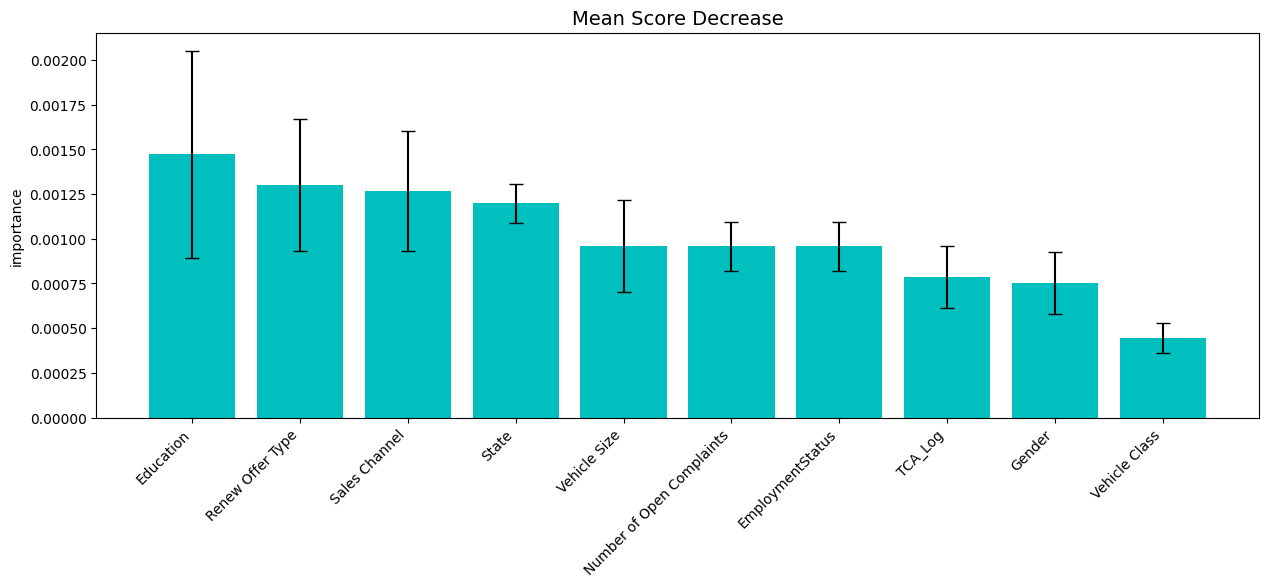

In [227]:
# Feature Importance
clv_imp = mean_score_decrease(X_train, y_train, pipe_tuned, plot=True, topk=10)


The bar chart illustrates the top 10 most important features in the model, ranked by mean score decrease, which indicates their impact on predictive performance. The Education feature has the highest importance, suggesting that it significantly influences the model's predictions. TCA_Log (Total Claim Amount), Number of Open Complaints, and Number of Policies also have high importance, indicating that financial and policy-related factors are critical. CLV_Log (Customer Lifetime Value) and Monthly Premium Auto contribute moderately, while Sales Channel and Renew Offer Type have lower, but still meaningful, influence. State and Months Since Policy Inception are the least impactful among the top 10 features, showing that they play a minor role in comparison. This insight can guide prioritization in customer analysis and strategy development.

## Conclusion 
-----


In [228]:
# Report Classification Report ReTuned with Best Parameter KNN
y_pred_retuned = g_res.predict(X_test)

report_retuned = classification_report(y_test, y_knn)

print('Classification Report ReTuned with Best Parameter KNN : \n', report_retuned)

Classification Report ReTuned with Best Parameter KNN : 
               precision    recall  f1-score   support

         0.0       0.99      0.90      0.94      1253
         1.0       0.61      0.95      0.74       209

    accuracy                           0.91      1462
   macro avg       0.80      0.92      0.84      1462
weighted avg       0.94      0.91      0.91      1462



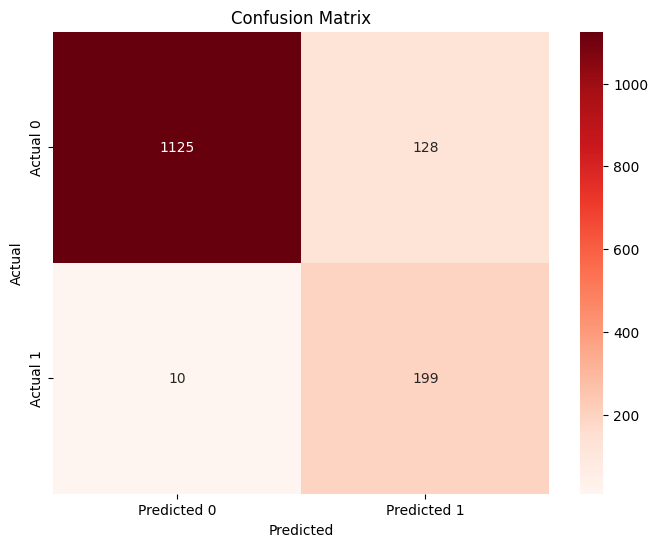

In [229]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_retuned), annot=True, fmt='d', cmap='Reds', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

## Classification Report Analysis

The classification report shows the following key metrics:

- **Recall for Class 0 (No Response):** 0.90 (90% of all actual "No" responses were correctly identified).
- **Recall for Class 1 (Yes Response):** 0.95 (95% of all actual "Yes" responses were correctly identified).
- **Precision for Class 0 (No Response):** 0.99 (99% of the predicted "No" responses were correct).
- **Precision for Class 1 (Yes Response):** 0.61 (61% of the predicted "Yes" responses were correct).
- **Overall Accuracy:** 0.90 (90% of the predictions were correct).

## Confusion Matrix Analysis

The confusion matrix illustrates the following:

- **True Positives (TP):** 199 - Correct predictions where the actual response was "Yes."
- **True Negatives (TN):** 1125 - Correct predictions where the actual response was "No."
- **False Positives (FP):** 128 - Incorrect predictions where the model predicted "Yes," but the actual response was "No."
- **False Negatives (FN):** 10 - Incorrect predictions where the model predicted "No," but the actual response was "Yes."


## Interpretation and Hypothetical Cost Analysis

If the model were used to filter potential customers to determine who would receive a "Yes" response, it would successfully predict 95% of the "Yes" responses (recall), and 90% of the "No" responses would be correctly filtered out. The precision of 61% indicates that when the model predicts a "Yes" response, it is correct 61% of the time, meaning that there is still a 39% chance of incorrectly predicting a "No" response as "Yes."

### Hypothetical Cost Analysis:

Given the classification report and confusion matrix, let's explore a cost scenario that accurately reflects the actual model's performance.

**Assumptions:**

- **Revenue gain from every 50 points in CLV:** $1
- **Total Number of Customers:** 1462

In [230]:
# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred_tuned)

# Convert the confusion matrix to a DataFrame
cm_df = pd.DataFrame(cm, index=['Actual Negative', 'Actual Positive'], columns=['Predicted Negative', 'Predicted Positive'])

# Display the entire confusion matrix
print(cm_df)

                 Predicted Negative  Predicted Positive
Actual Negative                1125                 128
Actual Positive                  10                 199


In [231]:
# True Positives: Actual = 1, Predicted = 1
tp_indices = (y_test == 1) & (y_pred_tuned == 1)
tp_data = X_test[tp_indices]
print("True Positives Data:")
print('Count: ', len(tp_data))
tp_data.head()

True Positives Data:
Count:  199


,State,Coverage,Education,EmploymentStatus,Gender,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size,CLV_log,Income_Log,TCA_Log
789,Arizona,Basic,College,Employed,M,Suburban,Married,74,22,94,3,2,Special Auto,Special L1,Offer2,Agent,Four-Door Car,Large,9.073036,11.336737,5.872681
2877,Arizona,Basic,Bachelor,Disabled,F,Suburban,Divorced,63,22,96,0,1,Corporate Auto,Corporate L3,Offer1,Web,Four-Door Car,Medsize,7.766173,9.896664,5.864751
5147,Oregon,Basic,Master,Retired,F,Urban,Married,62,0,59,0,2,Corporate Auto,Corporate L2,Offer1,Agent,Two-Door Car,Medsize,9.391160,9.976459,5.550044
3665,Oregon,Basic,College,Unemployed,F,Suburban,Divorced,66,16,35,4,1,Personal Auto,Personal L3,Offer1,Branch,Four-Door Car,Small,7.603075,0.000000,5.758271
6442,California,Extended,College,Retired,F,Suburban,Divorced,139,3,51,0,1,Personal Auto,Personal L3,Offer1,Agent,Sports Car,Medsize,8.497989,9.465138,6.503090


In [232]:
# False Positives: Actual = 0, Predicted = 1
fp_indices = (y_test == 0) & (y_pred_tuned == 1)
fp_data = X_test[fp_indices]
print("False Positives Data:")
print('Count: ', len(fp_data))
fp_data.head()

False Positives Data:
Count:  128


,State,Coverage,Education,EmploymentStatus,Gender,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size,CLV_log,Income_Log,TCA_Log
4833,Arizona,Extended,Master,Employed,M,Suburban,Married,218,17,2,0,3,Personal Auto,Personal L2,Offer1,Agent,Luxury SUV,Medsize,9.765407,10.365238,6.953111
1319,Washington,Basic,Bachelor,Employed,M,Urban,Married,111,0,49,5,6,Personal Auto,Personal L1,Offer2,Agent,SUV,Medsize,9.009029,11.114491,5.752193
7703,Arizona,Extended,High School or Below,Employed,F,Suburban,Married,87,35,48,0,1,Personal Auto,Personal L1,Offer4,Agent,Four-Door Car,Medsize,8.151863,10.395558,6.240357
2205,Arizona,Basic,College,Employed,F,Suburban,Married,63,32,94,0,1,Personal Auto,Personal L2,Offer2,Call Center,Four-Door Car,Medsize,7.839916,10.913068,5.711751
130,Arizona,Basic,High School or Below,Employed,M,Suburban,Married,109,14,82,0,1,Personal Auto,Personal L3,Offer1,Agent,Sports Car,Medsize,8.367720,10.093612,6.259964


In [233]:
# False Negatives: Actual = 1, Predicted = 0
fn_indices = (y_test == 1) & (y_pred_tuned == 0)
fn_data = X_test[fn_indices]
print("False Negatives Data:")
print('Count: ', len(fn_data))
fn_data.head()

False Negatives Data:
Count:  10


,State,Coverage,Education,EmploymentStatus,Gender,Location Code,Marital Status,Monthly Premium Auto,Months Since Last Claim,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Vehicle Class,Vehicle Size,CLV_log,Income_Log,TCA_Log
1102,California,Basic,College,Unemployed,F,Suburban,Divorced,118,14,64,0,4,Corporate Auto,Corporate L3,Offer1,Agent,SUV,Medsize,9.072792,0.000000,6.339301
4917,Nevada,Extended,High School or Below,Employed,F,Suburban,Married,97,0,40,0,1,Corporate Auto,Corporate L3,Offer3,Agent,Four-Door Car,Small,8.273685,11.107600,6.324537
4103,Arizona,Basic,Bachelor,Employed,M,Suburban,Single,73,6,85,0,2,Corporate Auto,Corporate L2,Offer1,Agent,Four-Door Car,Medsize,9.062169,11.486181,5.859075
5637,Nevada,Basic,High School or Below,Employed,F,Rural,Single,65,15,58,0,1,Corporate Auto,Corporate L3,Offer2,Agent,Four-Door Car,Medsize,7.829866,10.688758,5.050656
13,Arizona,Basic,High School or Below,Employed,M,Suburban,Married,110,23,25,1,8,Corporate Auto,Corporate L3,Offer2,Branch,SUV,Medsize,9.084666,11.511374,6.269096


### Without the Model :

- **Correctly Approached "Yes" Responses:** 209 (Total actual "Yes" responses)


In [234]:
# Concatenate DataFrames horizontally (adding columns)
tp_fn_1 = pd.concat([tp_data, fn_data], axis=0)
print('TP + FN count: ',len(tp_fn_1))

tp_fn_2 = pd.concat([tp_fn_1, clv], join='inner', axis=1)

# Select only the 'Customer Lifetime Value' column
df_tp = tp_fn_2[['Customer Lifetime Value']]

# Calculate reveue
df_tp['Revenue'] = (df_tp['Customer Lifetime Value'] // 50) * 1
df_tp['Revenue'] = df_tp['Revenue'].astype(int)

# Sum the values in the Revenue column
revenue_without_model = df_tp['Revenue'].sum()
print("Total revenue without model (in TP + FN) : $",revenue_without_model)
df_tp

TP + FN count:  209
Total revenue without model (in TP + FN) : $ 33610


,Customer Lifetime Value,Revenue
789,8717.049833,174
2877,2359.423599,47
5147,11981.984810,239
3665,2004.350666,40
6442,4904.894731,98
...,...,...
3552,2619.337376,52
503,7582.113842,151
1722,2574.020376,51
616,13869.927050,277


### With the Model:

- **Predicted "Yes" Responses (True Positive):** 199
- **Incorrectly Predicted "Yes" Responses (False Positives):** 128

In [235]:
# Concatenate DataFrames horizontally (adding columns)
rev_model = pd.concat([tp_data, fp_data], axis=0)
print('TP + FP count: ',len(rev_model))

df_concat2 = pd.concat([rev_model, clv], join='inner', axis=1)

# Select only the 'Customer Lifetime Value' column
rev_model2 = df_concat2[['Customer Lifetime Value']]

rev_model2['Revenue'] = (rev_model2['Customer Lifetime Value'] // 50) * 1
rev_model2['Revenue'] = rev_model2['Revenue'].astype(int)

# Sum the values in the Revenue column
model_revenue = rev_model2['Revenue'].sum()
print("Total revenue with model (in TP + FP): ",model_revenue)
rev_model2

TP + FP count:  327
Total revenue with model (in TP + FP):  54084


,Customer Lifetime Value,Revenue
789,8717.049833,174
2877,2359.423599,47
5147,11981.984810,239
3665,2004.350666,40
6442,4904.894731,98
...,...,...
1506,32961.152250,659
4441,4491.909095,89
346,5385.853211,107
2110,5880.256499,117


### Revenue gain

In [236]:
diff_rev = model_revenue - revenue_without_model
perctg = (diff_rev/revenue_without_model)*100
print('Gaining Revenue: ', diff_rev)
print('Percentage gaining revenue: ', perctg)

Gaining Revenue:  20474
Percentage gaining revenue:  60.916393930377865


### Summary of Revenue
- **Without model (TP + FP): $33610**
- **With model (TP + FN) : $54084** 
- **Difference:** $54084 − $33610 = **$20474**
- **Percentage Revenue:** ($20474 / $33610) × 100 = **60.91%**

Implementing the model resulted in a significant revenue increase, with total earnings rising from $33,610 (without the model) to $54,084 (with the model). This represents a difference of $20,474, translating to a 60.91% increase in revenue, highlighting the model's effectiveness in boosting financial performance.

## Recommendations for Business and Project Model
------

### Business Recommendations

1. **Targeted Strategy for Policyholder Growth:**
   - **Leverage the Model for Accurate Targeting:** Implement the KNN model to accurately identify and target customers who are likely to renew their policies. By focusing on these potential policyholders, the company can significantly increase the number of renewals, leading to substantial revenue growth.
   - **Maximize Policyholder Retention:** The model's ability to correctly predict renewals allows the company to enhance its retention efforts, ensuring that more customers choose to extend their policies. This increase in retained customers directly contributes to higher revenue.

2. **Revenue Enhancement:**
   - **Achieve Substantial Revenue Gains:** The implementation of the model has demonstrated a significant revenue increase, with total earnings rising by 60.91%. This growth reflects the model's effectiveness in accurately identifying potential renewals and converting them into actual revenue.
   - **Focus on High-Impact Opportunities:** By concentrating efforts on customers identified by the model as likely to renew, the company can maximize revenue potential and achieve a higher return on investment.

3. **Ongoing Model Optimization:**
   - **Continuous Model Refinement:** Regularly monitor and refine the model to ensure its ongoing accuracy in predicting policy renewals. As the model continues to evolve with new data, it will maintain its effectiveness in driving revenue growth.
   - **Adapt to Customer Behavior:** Stay responsive to changes in customer behavior by incorporating new insights into the model. This adaptability will help sustain revenue increases over time by ensuring that the company continues to target the most promising policyholders.

### Project Model Recommendations

1. **Model Implementation:**
   - **Deploy the Model in Production:** Integrate the KNN model into your customer relationship management (CRM) system or marketing automation platform. Ensure seamless integration so that predictions can be used to inform real-time marketing decisions.
   - **Conduct A/B Testing:** Perform A/B testing to compare the performance of the model-based approach against traditional marketing methods. This will provide empirical evidence of the model’s effectiveness and help justify its use.

2. **Data Management:**
   - **Maintain Data Quality:** Ensure high-quality and up-to-date data for the model to function effectively. Regularly clean and preprocess the data to avoid inaccuracies that could affect model performance.
   - **Expand Data Sources:** Consider incorporating additional data sources to enhance the model’s predictions. This could include behavioral data, social media interactions, or external market trends.

3. **Evaluation and Metrics:**
   - **Track Key Performance Indicators (KPIs):** Monitor KPIs such as precision, recall, and overall accuracy to assess the model’s impact on marketing outcomes. Evaluate these metrics regularly to ensure the model continues to meet business objectives.
   - **Analyze Model Impact:** Use detailed analyses and reports to understand the model’s impact on marketing efficiency and customer engagement. Share insights with stakeholders to demonstrate the value and drive data-driven decision-making.

4. **Risk Management:**
   - **Address False Positives:** Develop strategies to manage the impact of false positives (incorrect "Yes" predictions) and mitigate any potential negative effects on customer experience or resource allocation.
   - **Prepare for Model Limitations:** Acknowledge that no model is perfect. Be prepared for scenarios where the model’s predictions may not align with actual outcomes and have contingency plans in place.



## Model for Untreated Data
------

Because our main model only accepts 52 columns, while for the untreated model we want to use one-hot for all its features, that will require KNN to have 63 columns.
Then, there is a difference in column requirements because our main model uses a pipeline that contains different encoders other than one-hot, such as binary encoders and ordinal encoders. This causes our main model to have fewer column requirements; binary and ordinal do not create additional columns.
In this untreated model, we also do not use other encoders because we want to minimize the treatment on this model because this model will be used for testing on untreated data.

In [265]:
# Split the data into features and target variable
X_untreated = clv1.drop('Response', axis=1)
y_untreated = clv1['Response']

# Split the dataset into training and testing sets
X_train_untreated, X_test_untreated, y_train_untreated, y_test_untreated = train_test_split(
    X_untreated,
    y_untreated,
    stratify=y_untreated,
    test_size=0.2,
    random_state=RANDOM_STATE
)

In [266]:
# Combine X_train and y_train
train_data = X_train_untreated.copy()
train_data['Response'] = y_train_untreated

# Separate the majority and minority classes
no_response = train_data[train_data['Response'] == 0]
yes_response = train_data[train_data['Response'] == 1]

# Undersample the majority class (No response) to match the minority class (Yes response)
no_response_undersampled = no_response.sample(len(yes_response), random_state=42)
balanced_train_data = pd.concat([no_response_undersampled, yes_response])

# Split the balanced training data back into features and target
X_train_balanced = balanced_train_data.drop('Response', axis=1)
y_train_balanced = balanced_train_data['Response']

# Now, repeat the split for testing to ensure it matches
X_test_combined = X_test_untreated.copy()
X_test_combined['Response'] = y_test_untreated

In [267]:
# Identify categorical columns automatically in the training set
x_train_categorical_columns = X_train_untreated.select_dtypes(include=['object', 'category']).columns.tolist()

# Identify numerical columns automatically in the training set
x_train_numerical_columns = X_train_untreated.select_dtypes(exclude=['object', 'category']).columns.tolist()

In [268]:
# Use OneHotEncoder with handle_unknown='ignore' for categorical columns
one_hot_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

# Apply One-Hot Encoding to all categorical columns in the training set
X_train_categorical_encoded = one_hot_encoder.fit_transform(X_train_balanced[x_train_categorical_columns])

# Create DataFrame with one-hot encoded columns for the training set
one_hot_encoded_columns = one_hot_encoder.get_feature_names_out(x_train_categorical_columns)
X_train_categorical_encoded_df = pd.DataFrame(X_train_categorical_encoded, columns=one_hot_encoded_columns, index=X_train_balanced.index)

# Combine the numerical features with the one-hot encoded categorical features in the training set
X_train_combined = pd.concat([X_train_balanced[x_train_numerical_columns], X_train_categorical_encoded_df], axis=1)

# Apply One-Hot Encoding to all categorical columns in the testing set
X_test_categorical_encoded = one_hot_encoder.transform(X_test_combined[x_train_categorical_columns])

# Create DataFrame with one-hot encoded columns for the testing set
X_test_categorical_encoded_df = pd.DataFrame(X_test_categorical_encoded, columns=one_hot_encoded_columns, index=X_test_combined.index)

# Combine the numerical features with the one-hot encoded categorical features in the testing set
X_test_combined = pd.concat([X_test_untreated[x_train_numerical_columns], X_test_categorical_encoded_df], axis=1)

In [269]:
# Initialize the KNN classifier
knn_untreated = KNeighborsClassifier()

For models without treatment (untreatment), there is no need to give hyperparameters treatment, because, in our opinion, giving hyperparameters is the same as the model that is given treatment, and the data is easier to understand by the model. Therefore, we decided not to use hyperparameters.

In [270]:
# Fit the classifier
knn_untreated.fit(X_train_combined, y_train_balanced)

KNeighborsClassifier()

In [271]:
# Make predictions on the test data
y_pred_untreated = knn_untreated.predict(X_test_combined)

# Evaluate the model using accuracy
accuracy = accuracy_score(y_test_untreated, y_pred_untreated)
print(f"Test Set Accuracy: {accuracy:.2f}")

Test Set Accuracy: 0.60


In [273]:
# Make predictions on the training data
y_hat_knn = knn_untreated.predict(X_train_combined)

# Make predictions on the testing data
y_pred_knn = knn_untreated.predict(X_test_combined)

In [275]:
report_retuned_knn = classification_report(y_test_untreated, y_pred_knn)
print(report_retuned_knn)

              precision    recall  f1-score   support

         0.0       0.96      0.56      0.71      1253
         1.0       0.25      0.88      0.39       209

    accuracy                           0.60      1462
   macro avg       0.61      0.72      0.55      1462
weighted avg       0.86      0.60      0.66      1462



In [276]:
# Print training and testing set accuracy
print('Training set accuracy: ', metrics.accuracy_score(y_train_balanced, y_hat_knn))
print('Test set accuracy: ', metrics.accuracy_score(y_test_untreated, y_pred_knn))

Training set accuracy:  0.8231780167264038
Test set accuracy:  0.6025991792065664


In [277]:
# Print training and testing set recall
print('Training set recall: ', metrics.recall_score(y_train_balanced, y_hat_knn))
print('Test set recall: ', metrics.recall_score(y_test_untreated, y_pred_knn))

Training set recall:  0.9713261648745519
Test set recall:  0.8755980861244019


In [278]:
# Save the tuned KNN model
joblib.dump(knn_untreated, 'knn_tuned_model.pkl')

['knn_tuned_model.pkl']